<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml


from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')

<ipython-input-1-95044c9e0569>:8: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')


In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados
estados_conteudo = []
for linha in fonte.find_all('nome'):
  conteudo = linha.get_text().strip().split('\n')
  estados_conteudo.append(conteudo[0])


sigla_conteudo = []
for linha in fonte.find_all('sigla'):
  conteudo = linha.get_text().strip().split('\n')
  sigla_conteudo.append(conteudo[0])


regiao_conteudo = []
for linha in fonte.find_all('regiao'):
  conteudo = linha.get_text().strip().split('\n')
  regiao_conteudo.append(conteudo[0])

# continue o codigo aqui

In [4]:
print(estados_conteudo)
print(sigla_conteudo)
print(regiao_conteudo)


['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [5]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv
NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

header = ['ESTADO', 'SIGLA', 'REGIAO']

with open(file='./estados-limpo.csv', mode='w', encoding='utf8',newline='') as fp:
  escritor_csv = csv.writer(fp, delimiter=';')
  escritor_csv.writerows([header] + list(map(lambda ESTADO, SIGLA, REGIAO : [ESTADO, SIGLA, REGIAO], estados_conteudo, sigla_conteudo, regiao_conteudo)))



### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [6]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte2 = pd.read_csv('/content/cidades-bruto.csv', sep=',')

In [7]:
# visualize os resultados
fonte2
# continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [8]:

cidades_br = fonte2.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]


In [9]:
cidades_br

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [10]:

cidades_br = cidades_br.rename(
    columns={
      "UF": "estado",
      "nome": "cidade",
      "Pop_est_2009": "populacao",
      "PIB": "pib",
      "PIB_percapita": "pib_percapita"
      }
)

In [11]:
cidades_br

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [12]:

cidades_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5555 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   cidade         5555 non-null   object 
 2   populacao      5555 non-null   int64  
 3   pib            5555 non-null   float64
 4   pib_percapita  5555 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 260.4+ KB


In [13]:
cols = cidades_br.select_dtypes(include=[object]).columns
cidades_br[cols] = cidades_br[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


In [14]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_br.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [15]:
# solução do exercício 1.3
cidades = pd.read_csv('/content/cidades-limpo.csv', sep=';')
estados = pd.read_csv('/content/estados-limpo.csv', sep=';')

In [17]:
cidades.columns = cidades.columns.str.upper()

In [18]:
display(cidades.head(3))
display(estados.head(3))


,ESTADO,CIDADE,POPULACAO,PIB,PIB_PERCAPITA
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turucu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitoria,320156,1.978263e+07,61790.589844


,ESTADO,SIGLA,REGIAO
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE


In [19]:
Brasil_df = cidades.merge(estados, on='ESTADO')
display(Brasil_df.head(3))

,ESTADO,CIDADE,POPULACAO,PIB,PIB_PERCAPITA,SIGLA,REGIAO
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,RIO GRANDE DO SUL,Turucu,4000,4.572388e+04,11430.969727,RS,SUL
2,ESPIRITO SANTO,Vitoria,320156,1.978263e+07,61790.589844,ES,SUDESTE


In [20]:
Brasil_df.to_csv('brasil.csv', sep=';', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [21]:
# solução do exercício 2.1
brasil_df = pd.read_csv('/content/brasil.csv', sep=';')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [22]:
# código para responder a pergunta

populacao_df = brasil_df[['CIDADE', 'POPULACAO']]
populacao_df = populacao_df.sort_values('POPULACAO', ascending=False)
populacao_df['POSIÇÃO'] = range(1, len(populacao_df) + 1)
populacao_df['POSIÇÃO'] = populacao_df['POSIÇÃO'].astype(str)+'º'
populacao_df['POPULACAO']= populacao_df['POPULACAO'].apply(lambda x: '{:,.0f}'.format(x).replace(',', '.'))
populacao_df = populacao_df[['POSIÇÃO','CIDADE', 'POPULACAO']]
top10_populacao = populacao_df[:10]
display(top10_populacao)



,POSIÇÃO,CIDADE,POPULACAO
4921,1º,Sao Paulo,11.037.593
785,2º,Rio de Janeiro,6.186.710
519,3º,Salvador,2.998.056
3070,4º,Brasilia,2.606.885
4523,5º,Fortaleza,2.505.552
4871,6º,Belo Horizonte,2.452.617
1812,7º,Curitiba,1.851.215
333,8º,Manaus,1.738.641
3542,9º,Recife,1.561.659
5219,10º,Belem,1.437.600


In [23]:
brasil_df.head(1)

,ESTADO,CIDADE,POPULACAO,PIB,PIB_PERCAPITA,SIGLA,REGIAO
0,BAHIA,Tremedal,18433,57883.992188,3140.23999,BA,NORDESTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [31]:
# código para responder a pergunta
pib_per_capita_ne_df = brasil_df[brasil_df['REGIAO'] == 'NORDESTE']
pib_per_capita_ne_df = brasil_df[brasil_df['REGIAO'] == 'NORDESTE'][['CIDADE', 'PIB_PERCAPITA', 'REGIAO']]
pib_per_capita_ne_df =pib_per_capita_ne_df.sort_values('PIB_PERCAPITA', ascending=False)
pib_per_capita_ne_df['POSIÇÃO'] = range(1, len(pib_per_capita_ne_df) + 1)
pib_per_capita_ne_df['POSIÇÃO'] = pib_per_capita_ne_df['POSIÇÃO'].astype(str)+'º'
pib_per_capita_ne_df['PIB_PERCAPITA']= pib_per_capita_ne_df['PIB_PERCAPITA'].apply(lambda x: '{:,.0f}'.format(x).replace(',', '.'))
pib_per_capita_ne_df = pib_per_capita_ne_df[['POSIÇÃO','CIDADE', 'PIB_PERCAPITA','REGIAO']]
piores_pib_per_capita_ne_df= pib_per_capita_ne_df[-5:]
display(piores_pib_per_capita_ne_df)

,POSIÇÃO,CIDADE,PIB_PERCAPITA,REGIAO
2852,1786º,Axixa,2.417,NORDESTE
5380,1787º,Timbiras,2.368,NORDESTE
103,1788º,Dom Inocencio,2.358,NORDESTE
2239,1789º,Cajapio,2.204,NORDESTE
4784,1790º,Sao Vicente Ferrer,1.930,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [35]:
# código para responder a pergunta
pib_sp_df =  brasil_df[brasil_df['SIGLA'] == 'SP'][['CIDADE', 'PIB','SIGLA']]
pib_sp_df =pib_sp_df.sort_values('PIB', ascending=False)
pib_sp_df['POSIÇÃO'] = range(1, len(pib_sp_df) + 1)
pib_sp_df['POSIÇÃO'] = pib_sp_df['POSIÇÃO'].astype(str)+'º'

pib_sp_df['PIB'] = pd.to_numeric(pib_sp_df['PIB'], errors='coerce')

pib_sp_df['PIB']= pib_sp_df['PIB'].apply(lambda x: '{:,.0f}'.format(x).replace(',', '.'))
pib_sp_df = pib_sp_df[['POSIÇÃO','CIDADE', 'PIB','SIGLA']]
top15_pib_sp_df= pib_sp_df[:15]
display(top15_pib_sp_df)

,POSIÇÃO,CIDADE,PIB,SIGLA
4921,1º,Sao Paulo,389.317.152,SP
4450,2º,Guarulhos,32.473.828,SP
5425,3º,Campinas,31.654.720,SP
3426,4º,Osasco,31.616.452,SP
979,5º,Sao Bernardo do Campo,28.935.768,SP
5456,6º,Barueri,26.908.070,SP
576,7º,Santos,22.546.134,SP
2509,8º,Sao Jose dos Campos,22.018.042,SP
2704,9º,Jundiai,16.585.137,SP
1027,10º,Santo Andre,14.709.603,SP


 - Qual é o PIB do estado de Santa Catarina?

In [50]:
pib_sc_df = brasil_df[brasil_df['SIGLA'] == 'SC']
pib_sc_df = pib_sc_df['PIB'].sum()

print(f'{pib_sc_df:,.2f}')

129,806,256.75


 - Qual é o população da região sul?

In [55]:
# código para responder a pergunta
populacao_sul_df = brasil_df[brasil_df['REGIAO'] == 'SUL']['POPULACAO']
populacao_sul_df = populacao_sul_df.sum()
print(f'{:,.2f}')

27,719,118.00


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [57]:

# código para responder a pergunta
pib_per_capita_ms_df = brasil_df[brasil_df['ESTADO'] == 'MATO GROSSO DO SUL']
pib_per_capita_medio_ms_df = pib_per_capita_ms_df['PIB_PERCAPITA'].mean()
print(f'{pib_per_capita_medio_ms_df:,.2f}')

14,458.90


 - Qual é a população do Brasil?

In [59]:
# código para responder a pergunta
populacao_brasil_df = brasil_df['POPULACAO'].sum()
print(f'{populacao_brasil_df:,.2f}')

191,176,146.00


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [63]:
# código para gerar a visualização
top10_menos_populacao = populacao_df[-10:]
display(top10_menos_populacao)

,POSIÇÃO,CIDADE,POPULACAO
987,5546º,Chapada de Areia,1.273
4313,5547º,Parari,1.266
33,5548º,Cedro do Abaete,1.221
2138,5549º,Miguel Leao,1.212
20,5550º,Oliveira de Fatima,1.129
4747,5551º,Nova Castilho,1.122
3601,5552º,Araguainha,1.115
4968,5553º,Anhanguera,1.018
3423,5554º,Serra da Saudade,890
4459,5555º,Bora,837


In [ ]:
import matplotlib.pyplot as plt


,CIDADE,POPULACAO
0,Chapada de Areia,1273
1,Parari,1266
2,Cedro do Abaete,1221
3,Miguel Leao,1212
4,Oliveira de Fatima,1129
5,Nova Castilho,1122
6,Araguainha,1115
7,Anhanguera,1018
8,Serra da Saudade,890
9,Bora,837


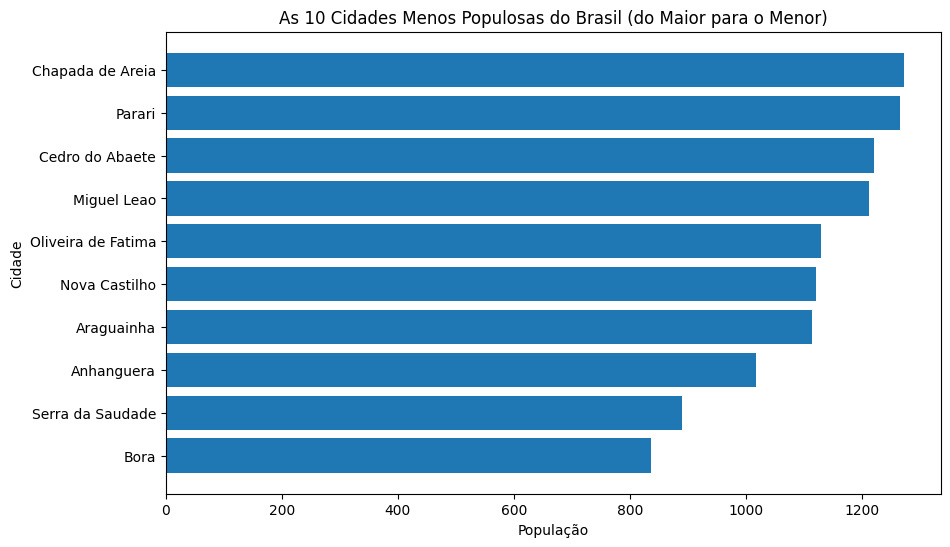

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Criando o DataFrame conforme fornecido
populacao_df = pd.DataFrame({

    'CIDADE': ['Chapada de Areia', 'Parari', 'Cedro do Abaete', 'Miguel Leao', 'Oliveira de Fatima',
               'Nova Castilho', 'Araguainha', 'Anhanguera', 'Serra da Saudade', 'Bora'],
    'POPULACAO': [1273, 1266, 1221, 1212, 1129, 1122, 1115, 1018, 890, 837]
})

# Ordenar do maior para o menor valor de população
top10_menos_populacao = populacao_df.sort_values(by='POPULACAO', ascending=False)

# Exibir o DataFrame ordenado
display(top10_menos_populacao)

# Criar o gráfico de barras horizontais com as barras da maior para a menor
plt.figure(figsize=(10, 6))
plt.barh(top10_menos_populacao['CIDADE'][::-1], top10_menos_populacao['POPULACAO'][::-1])
plt.xlabel('População')
plt.ylabel('Cidade')
plt.title('As 10 Cidades Menos Populosas do Brasil (do Maior para o Menor)')

# Exibir o gráfico
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

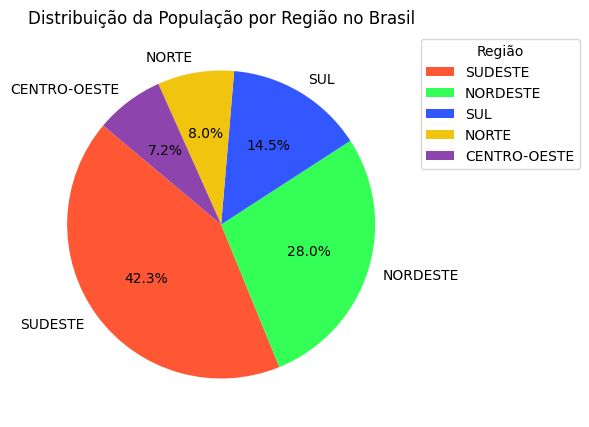

In [89]:
# código para gerar a visualização
# Agrupando e somando a população por região
df_agrupado = brasil_df[['REGIAO', 'POPULACAO']].groupby('REGIAO').agg('sum')

# Ordenando a população em ordem decrescente
df_agrupado = df_agrupado.sort_values(by='POPULACAO', ascending=False)

# Definindo cores populares e agradáveis para o gráfico
cores =  ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD']

# Criando o gráfico de pizza com as cores definidas
plt.figure(figsize=(5, 5))
plt.pie(df_agrupado['POPULACAO'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição da População por Região no Brasil')

# Ajustando a legenda para maior clareza
plt.legend(title='Região', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrando o gráfico
plt.show()